# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [8]:
# Your code here. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

student_data = pd.DataFrame({'StudentID': [1,2,3,4,5,6,7,8,9,10], 'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

Text(0.5, 1.0, 'Tardies vs Age')

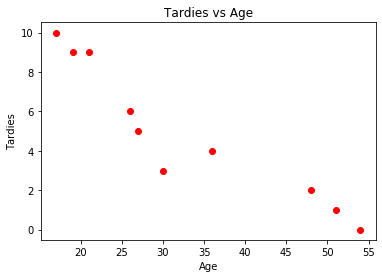

In [9]:
# Your code here.
plt.scatter(x='Age', y='Tardies', data=student_data, marker='o', color='red')
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.title('Tardies vs Age')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [10]:
# Your response here. 

# Parece que se observa una tendencia negativa que relaciona la edad con la tardanza en clase (a más edad, menor tardanza).

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [11]:
# Your response here.
from scipy.stats import pearsonr
covariance = np.cov(student_data[['Age', 'Tardies']])
coef, p = pearsonr(student_data['Age'], student_data['Tardies'])
print(f' Covariance is {covariance}')
print(f' Pearson Coefficent is {coef}, p-value associated is {p}')

 Covariance is [[  24.5  175.    77.    42.   112.   161.    35.    70.   189.    94.5]
 [ 175.  1250.   550.   300.   800.  1150.   250.   500.  1350.   675. ]
 [  77.   550.   242.   132.   352.   506.   110.   220.   594.   297. ]
 [  42.   300.   132.    72.   192.   276.    60.   120.   324.   162. ]
 [ 112.   800.   352.   192.   512.   736.   160.   320.   864.   432. ]
 [ 161.  1150.   506.   276.   736.  1058.   230.   460.  1242.   621. ]
 [  35.   250.   110.    60.   160.   230.    50.   100.   270.   135. ]
 [  70.   500.   220.   120.   320.   460.   100.   200.   540.   270. ]
 [ 189.  1350.   594.   324.   864.  1242.   270.   540.  1458.   729. ]
 [  94.5  675.   297.   162.   432.   621.   135.   270.   729.   364.5]]
 Pearson Coefficent is -0.939162688688712, p-value associated is 5.566653834553479e-05


In [ ]:
# La covarianza y la correlación están relacionadas entre sí. La covarianza indica dirección y el grado de variación entre dos variables,
# mientras que la correlación indica tanto la dirección (signo) y como de fuerza de esta relación. Cabe indicar que la covarianza tiene las unidades de las variables,
# mientras que la correlación es adimensional.

# El test de Pearson nos informa de que ambas variables están fuertemente relacionadas. (-93%)

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [15]:
# Outcome (y) --> Tardies
# Explanatory Variable (x) --> Age
# Regression Lineal because both variables are numerical and ratio (they have a zero absolute in their respective scale)
x = student_data['Age']
y = student_data['Tardies']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print('Slope: ',slope)
print('Intercept: ',intercept)
print('r: ', r_value)
print('p_val: ', p_value)
print('std_err: ', std_err)

Slope:  -0.2428207709159808
Intercept:  12.888803363135768
r:  -0.9391626886887121
p_val:  5.56665383455343e-05
std_err:  0.03139728816158607


Plot your regression model on your scatter plot.

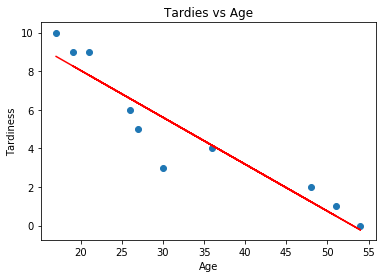

In [19]:
# Your code here.

plt.scatter(x,y)
plt.xlabel('Age')
plt.ylabel('Tardiness')
plt.title('Tardies vs Age')
plt.plot(x, slope*x + intercept, c='red')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 

# We can conclude the Age is a good predictor of Tardiness

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [39]:
# Import any libraries you may need & the data
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [26]:
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

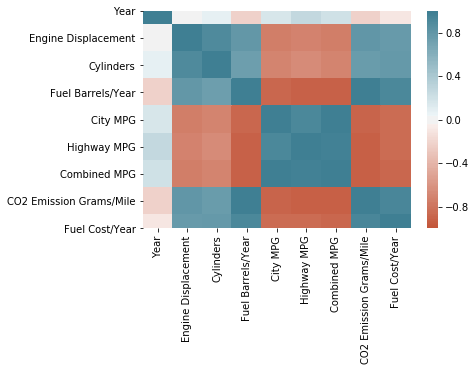

In [41]:
# Your response here. 
subset = vehicles[['CO2 Emission Grams/Mile', 'Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

corr = vehicles.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200)
)

In [ ]:
# The most important variables are Fuel Barrels/Year, Fuel Cost/Year, and Combined MPG. 
# All others are also related with this 3, so it would have redundant information.
# The least important variable is Year so it is excluded for the analysis.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [44]:
# Your response here. 

# Regression Multiple Linear Analysis

linear_regress = LinearRegression()
x = subset[['Fuel Barrels/Year', 'Fuel Cost/Year', 'Combined MPG']]
y = subset['CO2 Emission Grams/Mile']

linear_regress.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [47]:
# Your response here. 
print(linear_regress.coef_)

[19.69545749  0.03166095 -3.166074  ]


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [48]:
# Your code here. 

data = pd.DataFrame({'X':[1,3,4,6,8,9,11,14], 'Y':[1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

R-squared value is : 0.9652303546573691


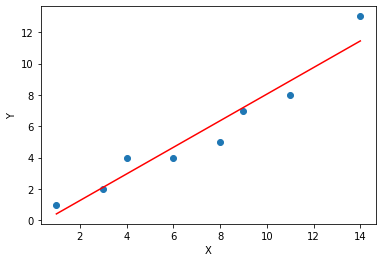

In [64]:
# Your code here.
x = data['X']
y = data['Y']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, slope*x + intercept, c='red')
print(f'R-squared value is : {r_value}')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

# There is a strong relation between both variables.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

R-squared value is : 0.971278116825086


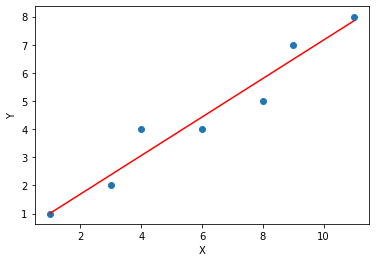

In [65]:
# Remove outlier

x = data['X'][0:-1]
y = data['Y'][0:-1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, slope*x + intercept, c='red')
print(f'R-squared value is : {r_value}')

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 

# Based on the results, the elimination of the outliers improved the R-squared value (the "strongness" between both variables)